# Task 4 - Prediction models

Arnau Claramunt - DV2816
---

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Generation of Data points

In [2]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

print(x_data)
print("-----------------------------------------------")
print(y_data)

[[-0.5       ]
 [-0.49497487]
 [-0.48994975]
 [-0.48492462]
 [-0.4798995 ]
 [-0.47487437]
 [-0.46984925]
 [-0.46482412]
 [-0.45979899]
 [-0.45477387]
 [-0.44974874]
 [-0.44472362]
 [-0.43969849]
 [-0.43467337]
 [-0.42964824]
 [-0.42462312]
 [-0.41959799]
 [-0.41457286]
 [-0.40954774]
 [-0.40452261]
 [-0.39949749]
 [-0.39447236]
 [-0.38944724]
 [-0.38442211]
 [-0.37939698]
 [-0.37437186]
 [-0.36934673]
 [-0.36432161]
 [-0.35929648]
 [-0.35427136]
 [-0.34924623]
 [-0.34422111]
 [-0.33919598]
 [-0.33417085]
 [-0.32914573]
 [-0.3241206 ]
 [-0.31909548]
 [-0.31407035]
 [-0.30904523]
 [-0.3040201 ]
 [-0.29899497]
 [-0.29396985]
 [-0.28894472]
 [-0.2839196 ]
 [-0.27889447]
 [-0.27386935]
 [-0.26884422]
 [-0.2638191 ]
 [-0.25879397]
 [-0.25376884]
 [-0.24874372]
 [-0.24371859]
 [-0.23869347]
 [-0.23366834]
 [-0.22864322]
 [-0.22361809]
 [-0.21859296]
 [-0.21356784]
 [-0.20854271]
 [-0.20351759]
 [-0.19849246]
 [-0.19346734]
 [-0.18844221]
 [-0.18341709]
 [-0.17839196]
 [-0.17336683]
 [-0.16834

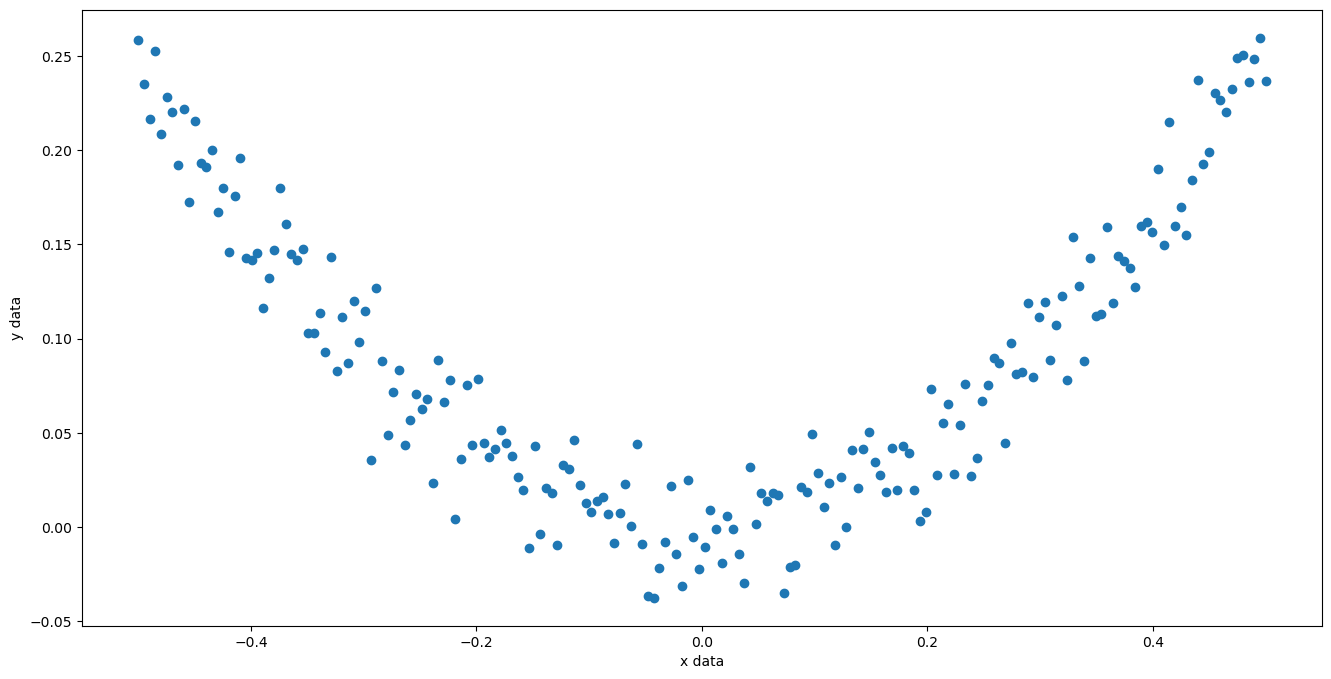

In [3]:
plt.figure(figsize=(16, 8))
plt.scatter(
    x_data,
    y_data
)
plt.xlabel("x data")
plt.ylabel("y data")
plt.show()

## a) Linear regression model to predict y data

In [4]:
# using sklearn

reg = LinearRegression()
reg.fit(x_data, y_data)

# LinearRegression(): This creates an instance of the linear regression model from the scikit-learn library. Linear regression is a type
#  of model used to understand the relationship between one or more independent variables (like x_data) and a dependent variable (y_data).

# reg.fit( This method trains (or "fits") the model to the provided data (x and y). The model tries to find the best-fitting straight line
# through the data points.

# print results

print("The linear model is: Y = {:.5} + {:.5}x".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 0.085417 + 0.0077352x


### Plotting the regression line

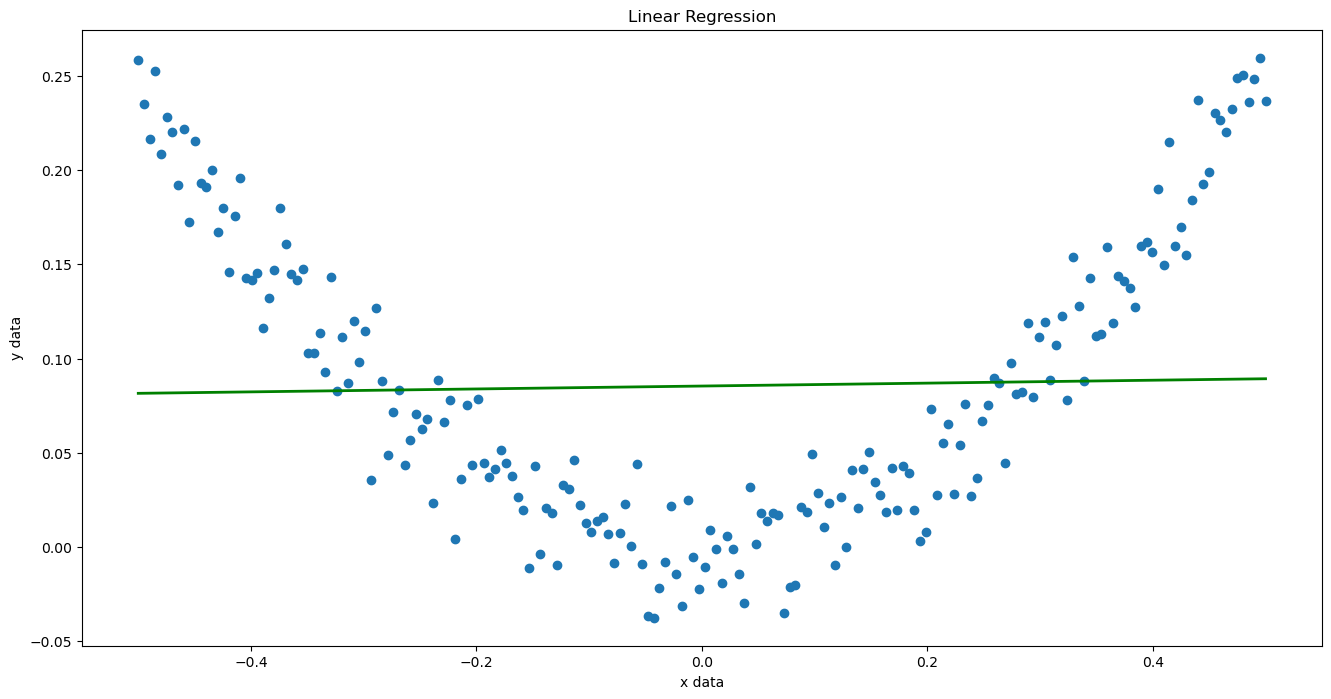

In [5]:
predictions = reg.predict(x_data)

#     reg.predict(x_data): we use the trained model (reg) to predict the corresponding values of y.

# The predict() method outputs an array of predicted sales values based on the corresponding x_data

plt.figure(figsize=(16, 8))
plt.scatter(
    x_data,
    y_data
)
plt.plot(
    x_data,
    predictions,
    c='green',
    linewidth=2
)
plt.xlabel("x data")
plt.ylabel("y data")
plt.title("Linear Regression")
plt.show()

In [7]:
# Calculate and print MSE
mse = mean_squared_error(y_data, predictions)
print(f"Mean Squared Error (MSE) Linear Regression: {mse}")

Mean Squared Error (MSE) Linear Regression: 0.00612257888384673


---
## b) Polynomial model with highest power of 2 to predict y data

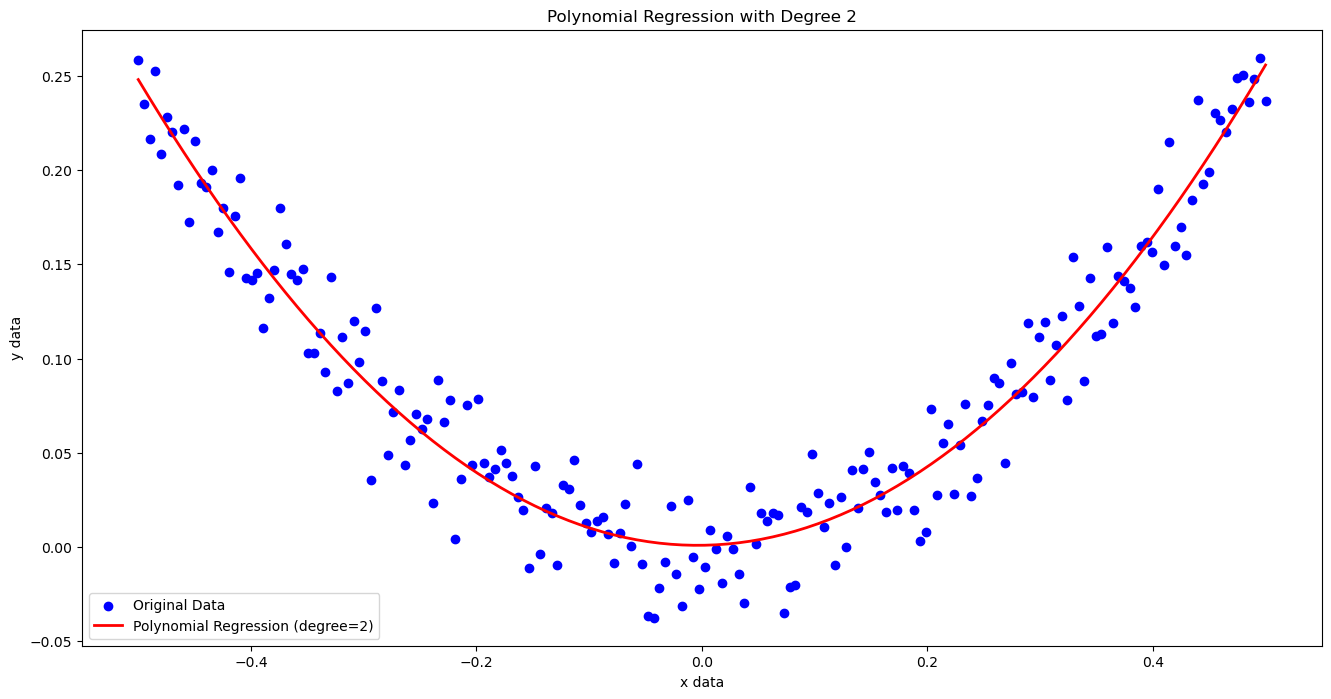

Polynomial Model: Y = 0.00089 + 0.00774x + 1.00425x^2


In [9]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial transformation (degree 2)
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x_data)

# fit the Linear Regression model on the polynomial data
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y_data)

# make predictions using the polynomial model
y_poly_pred = poly_reg_model.predict(x_poly)

# plot the original data and the polynomial regression predictions
plt.figure(figsize=(16, 8))
plt.scatter(x_data,
    y_data,
    color='blue',
    label='Original Data')
plt.plot(x_data, y_poly_pred, color='red', linewidth=2, label='Polynomial Regression (degree=2)')
plt.xlabel("x data")
plt.ylabel("y data")
plt.title("Polynomial Regression with Degree 2")
plt.legend()
plt.show()

# print the equation of the polynomial model
print("Polynomial Model: Y = {:.5f} + {:.5f}x + {:.5f}x^2".format(
    poly_reg_model.intercept_[0], poly_reg_model.coef_[0][1], poly_reg_model.coef_[0][2])
)

In [10]:
# Calculate and print MSE
mse_poly = mean_squared_error(y_data, y_poly_pred)
print(f"Mean Squared Error (MSE) for Polynomial Regression: {mse_poly}")

Mean Squared Error (MSE) for Polynomial Regression: 0.0004069338540299511


---
## c) Three-layer Neural Network (using Tensorflow)

In [4]:
# First split the dataset into training 80% and testing data 20%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1444 - val_loss: 0.0986
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1038 - val_loss: 0.0761
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1141 - val_loss: 0.0587
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0986 - val_loss: 0.0466
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634 - val_loss: 0.0380
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0585 - val_loss: 0.0320
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0388 - val_loss: 0.0278
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - val_loss: 0.0246
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - val_loss: 0.0220
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0276 - val_loss: 0.0203
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0281 - val_loss: 0.0189
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

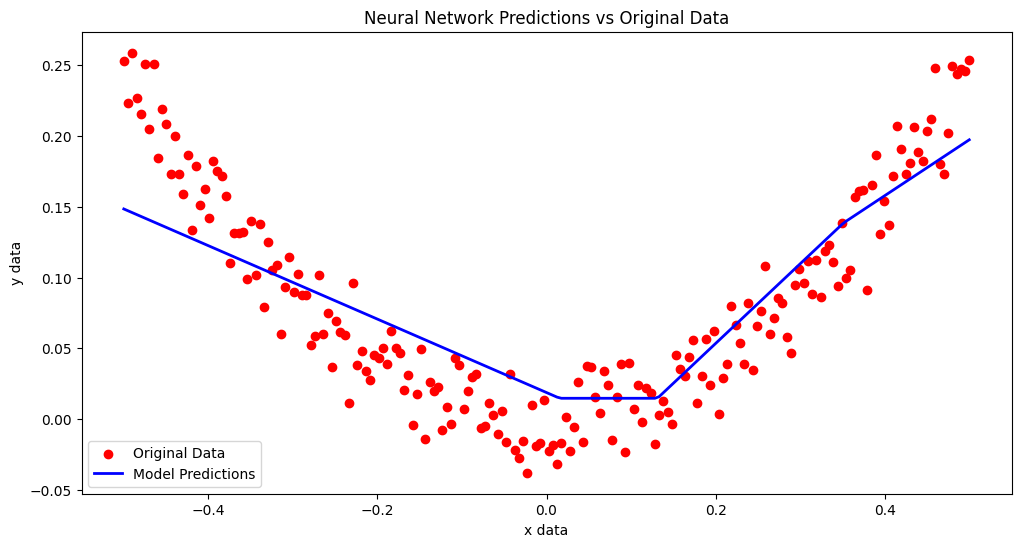

In [5]:
# The NN will have 1 input layer, 1 hidden (6 nodes) and 1 output layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential()

# Input layer and hidden layer (6 neurons)
model.add(Dense(units=6, activation='relu', input_shape=(1,)))

# Output layer (1 neuron)
model.add(Dense(units=1))

# Compile the model (Mean Squared Error loss for regression, Adam optimizer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model on test data
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions
predictions = model.predict(x_data)

# Plot the original data and the model's predictions
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label="Original Data", color="red")
plt.plot(x_data, predictions, label="Model Predictions", color="blue", linewidth=2)
plt.xlabel("x data")
plt.ylabel("y data")
plt.legend()
plt.title("Neural Network Predictions vs Original Data")
plt.show()